In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Data Exploration

In [12]:
df=pd.read_csv(r"C:\Users\disha\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")
print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [13]:
print(df.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


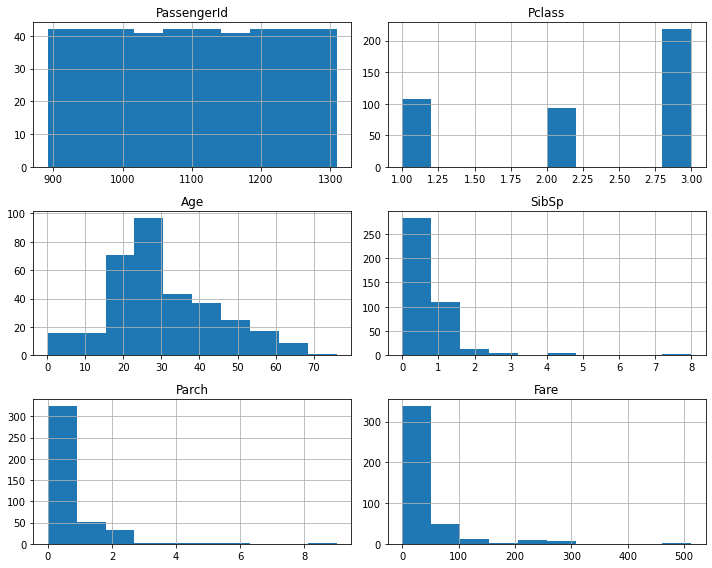

In [14]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

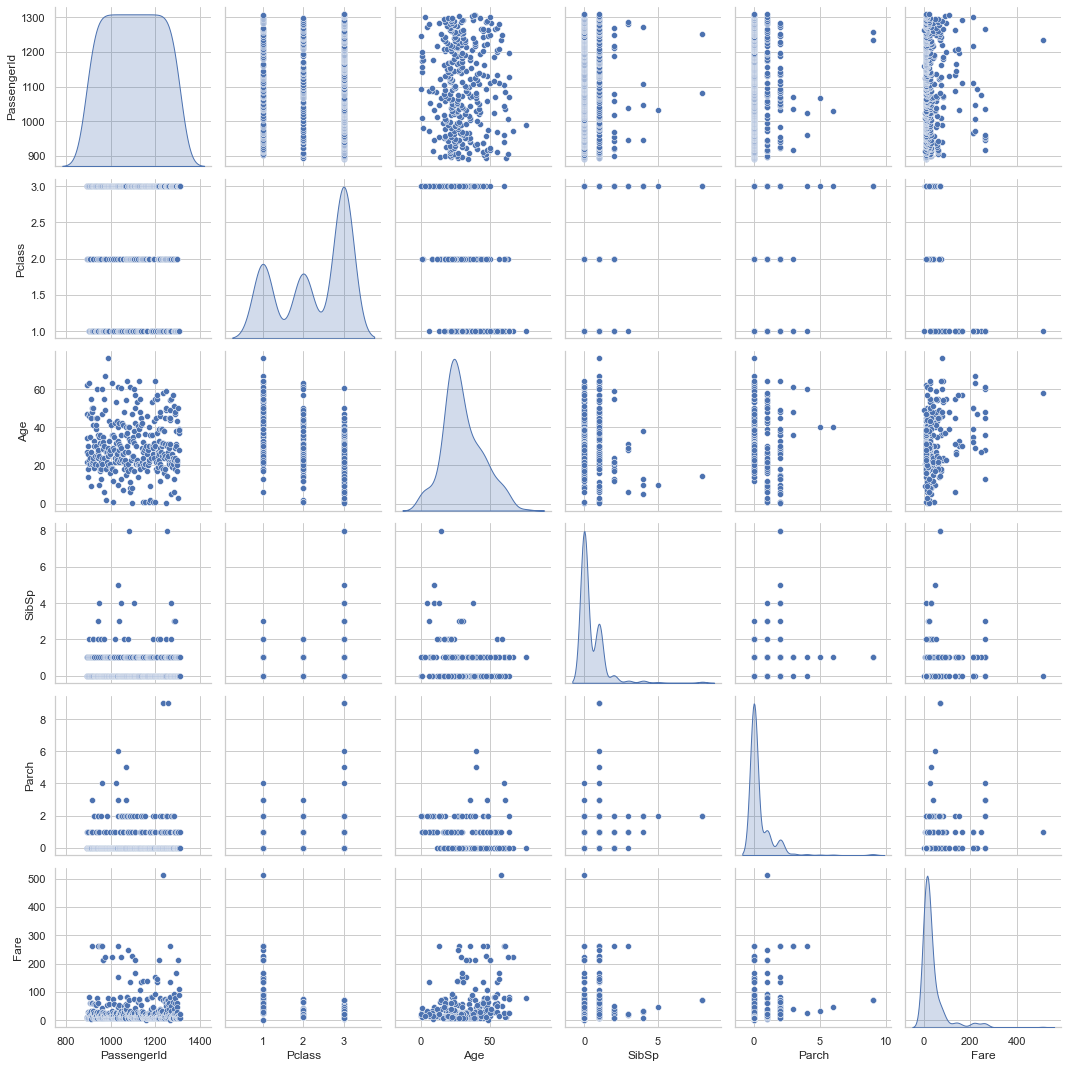

In [13]:
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()
plt.show()

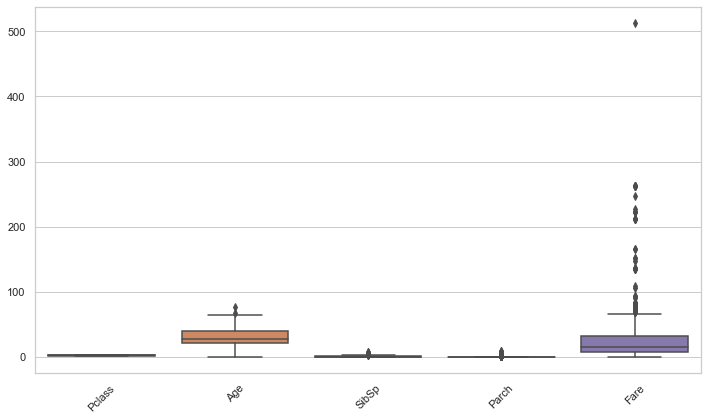

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['PassengerId']))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

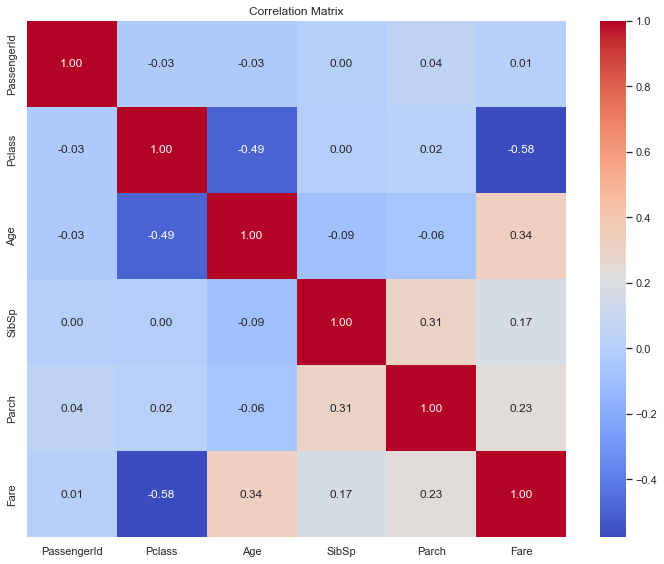

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [17]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols= df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [16]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [19]:
print(df.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [21]:
df_encoded = pd.get_dummies(df, columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
print(df_encoded.head())

   PassengerId  Pclass   Age  SibSp  Parch     Fare  \
0          892       3  34.5      0      0   7.8292   
1          893       3  47.0      1      0   7.0000   
2          894       2  62.0      0      0   9.6875   
3          895       3  27.0      0      0   8.6625   
4          896       3  22.0      1      1  12.2875   

   Name_Abbott, Master. Eugene Joseph  Name_Abelseth, Miss. Karen Marie  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Name_Abelseth, Mr. Olaus Jorgensen  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4            

# . Model Building

In [3]:
train_df = pd.read_csv(r"C:\Users\disha\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")

print("Columns in the training dataset:")
print(train_df.columns)


print(train_df.head())
print(train_df.info())
print(train_df.describe())


train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)


X = train_df.drop(columns=['Survived'])
y = train_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)


y_pred = model.predict(X_test)

Columns in the training dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  

# Model Evaluation

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-score: 0.7586206896551724
ROC-AUC: 0.8764478764478765
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



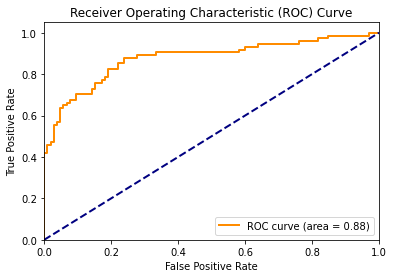

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
 X_test.shape

(179, 9)

In [15]:
ypred1=model.predict( X_test)

In [16]:
model.score( X_test,y_test)

0.8044692737430168

# Interpretation

In [102]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)

       Feature  Coefficient  Odds Ratio
0  PassengerId     0.000357    1.000357
1       Pclass    -0.939352    0.390881
2          Age    -0.030766    0.969702
3        SibSp    -0.296436    0.743463
4        Parch    -0.116621    0.889922
5         Fare     0.002712    1.002716
6     Sex_male    -2.618440    0.072917
7   Embarked_Q    -0.050907    0.950367
8   Embarked_S    -0.347279    0.706608


passenger Class: Higher class passengers likely had priority during evacuation.
Sex: Women and children historically received priority for lifeboats.
Age: Children and elderly passengers may have had higher survival rates.
Siblings/Spouses and Parents/Children: Families may have influenced survival.
Fare: Higher fares could mean better access to safety measures.
Embarked: Port of embarkation may correlate with socio-economic status.
Cabin: Location on the ship could impact proximity to life-saving resources.
By analyzing these features in relation to the target variable (survived), we can gain insights into the significance of each feature in predicting survival probabilities.

In [120]:
!pip install flask
!pip install streamlit

In [121]:
!pip install flask

In [4]:
import flask
print(flask.__version__)


1.1.2
